In [1]:
!pip install scanpy
!pip install KDEpy
!pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


# Analysis of clusters in sample S3

In [2]:
import pandas as pd
import scanpy as sc
import anndata as ad
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.sparse as sps
from scipy.stats import ranksums, spearmanr, kendalltau

import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import tools.util_probe as up
import tools.util as ut
import tools.NB_est as nb
import tools.countsplit as cs
import tools.ClusterDE as cd

import importlib

## Preprocessing
### Read data

In [3]:
data_path = "../../data/BacDrop"
data_gene = sc.read_h5ad(data_path + "/klebsiella_BIDMC35_data_processed_2.h5ad")


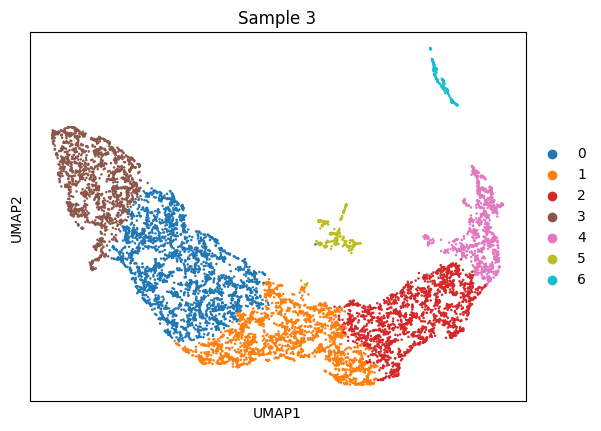

In [4]:
sc.pl.umap(data_gene, color="leiden_opt", palette="tab10", title="Sample 3")
plt.show()

## Generate synthetic null data for ClusterDE

### Estimate distribution and parameters for every gene

In [5]:
importlib.reload(nb)
import warnings
warnings.filterwarnings("ignore")
nb.estimate_overdisp_nb(data_gene, layer="counts", flavor="statsmod_auto")


gene 0
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
gene 100
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
gene 200
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params


gene 1200
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
gene 1300
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both 

gene 2100
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
gene 2200
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both 

In [6]:
data_gene.var

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,var_counts,is_scd_outlier,nb_overdisp,...,means,variances,variances_norm,gene_mean,gene_var,mean_var_diff,gene_dist,est_mean,est_overdisp,est_zero_inflation
cds-OWG15609.1,9,0.000982,0.000981,99.901832,9.0,2.302585,9,0.000981,False,0.045494,...,0.000982,0.000981,0.983433,0.000982,0.000981,9.636866e-07,poi,0.005008,inf,0.803549
cds-OWG15869.1,15,0.001963,0.001961,99.836387,18.0,2.944439,15,0.002614,False,0.022197,...,0.001963,0.002614,1.290825,0.001963,0.002614,-6.505955e-04,nb,0.001968,0.014223,0.000000
cds-OWG15870.1,7,0.000873,0.000872,99.923647,8.0,2.197225,7,0.001090,False,0.004161,...,0.000873,0.001090,1.231782,0.000873,0.001090,-2.173887e-04,nb,0.000864,0.002902,0.000000
cds-OWG15871.1,14,0.001854,0.001853,99.847295,17.0,2.890372,14,0.002724,False,0.028152,...,0.001854,0.002724,1.425858,0.001854,0.002723,-8.691620e-04,nb,0.001857,0.028309,0.000000
cds-OWG15872.1,35,0.004145,0.004136,99.618237,38.0,3.663562,35,0.004783,False,0.134263,...,0.004145,0.004783,1.121176,0.004145,0.004782,-6.372705e-04,nb,0.004136,0.023771,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cds-OWG24206.1,45,0.005017,0.005005,99.509162,46.0,3.850148,45,0.005211,False,0.108141,...,0.005017,0.005211,1.012521,0.005017,0.005210,-1.929753e-04,nb,0.005021,0.022296,0.000000
cds-OWG24207.1,73,0.008181,0.008147,99.203752,75.0,4.330733,73,0.008551,False,0.252581,...,0.008181,0.008551,1.014898,0.008181,0.008550,-3.693775e-04,nb,0.008177,0.173607,0.000000
cds-OWG24208.1,264,0.029996,0.029555,97.120419,275.0,5.620401,264,0.032148,False,0.676339,...,0.029996,0.032154,1.012570,0.029996,0.032150,-2.154363e-03,nb,0.029999,0.523862,0.000000
cds-OWG24214.1,39,0.004472,0.004462,99.574607,41.0,3.737670,39,0.004888,False,0.123162,...,0.004472,0.004889,1.064154,0.004472,0.004888,-4.163007e-04,nb,0.004471,0.049165,0.000000


## Find optimal correlation matrix scaling and generate synthetic null data

In [7]:
importlib.reload(cd)
try:
    xmin, fval, R_est_noscale = cd.select_covariance_scaling(data_gene, cor_cutoff=0.1, min_scale=1, max_scale=2, maxiter=20, rng_seed=1234)
except:
    _, R_est_noscale = cd.generate_nb_data_copula(data_gene, rng_seed=1234, nb_flavor="statsmod_auto",
                                                  auto_dist=True, correct_var=True, return_R=True, corr_factor=1,
                                                  R_est=None, check_pd=True)
    xmin = 1
print(xmin)

Factor: 1 - Error: 4.041918528908967
Factor: 2 - Error: 4.00457074545374
Factor: 3.6180339999999998 - Error: 4.156050482853335
Factor: 2 - Error: 4.00457074545374
Factor: 2.61803399102434 - Error: 4.117673739252093
Factor: 1.61803399 - Error: 4.02189130671979
Factor: 2.236067977595943 - Error: 4.124938568305249
Factor: 1.85410196720468 - Error: 4.014436844859676
Factor: 2.090169943491092 - Error: 3.9927176391188994
Factor: 2.1458980334449658 - Error: 4.088697935717567
Factor: 2.055728089953874 - Error: 4.0149523312860405
Factor: 2.1114561796556943 - Error: 4.081605490145165
Factor: 2.0770143261184764 - Error: 3.8883124370859607
Factor: 2.0688837074227657 - Error: 4.094410373801204
Factor: 2.0820393247953812 - Error: 4.03451019601439
Factor: 2.0739087061364447 - Error: 4.117675621252602
Factor: 2.078933704813349 - Error: 3.9067571198755746
Factor: 2.0758280848453636 - Error: 3.981747026848804
Factor: 2.077747463540236 - Error: 3.9889508046021596
Factor: 2.0765612222724883 - Error: 3.909

In [8]:
importlib.reload(cd)

# Generate scaling matrix
cor_orig = cd.schaefer_strimmer(data_gene.layers["counts"].toarray(), use_corr=True)
factor_cor = (np.abs(cor_orig) > 0.1)
cf = factor_cor * xmin
cf[cf == 0] = 1
np.fill_diagonal(cf, 1)


In [9]:
importlib.reload(cd)
n, p = data_gene.X.shape
data_null_gen, R_est = cd.generate_nb_data_copula(data_gene, rng_seed=5678, nb_flavor="statsmod_auto",
                                                  auto_dist=True, correct_var=True, return_R=True, new_data_shape=(2*n, p),
                                                  corr_factor=cf, R_est=R_est_noscale, check_pd=False, min_nonzero=2)


In [10]:
sc.pp.calculate_qc_metrics(data_null_gen)
data_null_gen.var["var_counts"] = np.asarray(np.var(data_null_gen.X, axis=0)).squeeze()
data_null_gen.var["mean_counts"] = np.asarray(np.mean(data_null_gen.X, axis=0)).squeeze()

In [11]:
data_gene_nonzero = data_gene[:, data_null_gen.var_names].copy()

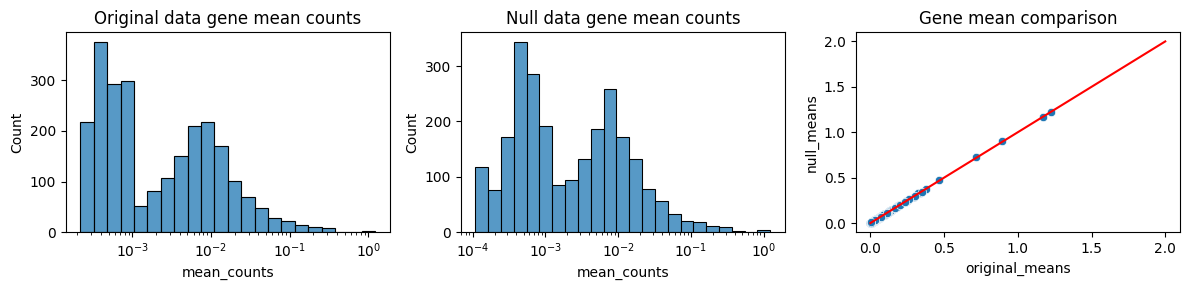

SignificanceResult(statistic=0.9795182023596122, pvalue=0.0)


In [12]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))
sns.histplot(data_gene_nonzero.var, x="mean_counts", ax=ax[0], log_scale=True)
ax[0].set_title("Original data gene mean counts")
sns.histplot(data_null_gen.var, x="mean_counts", ax=ax[1], log_scale=True)
ax[1].set_title("Null data gene mean counts")

mean_df_opt = pd.DataFrame({"original_means": data_gene_nonzero.var["mean_counts"], "null_means": data_null_gen.var["mean_counts"]})
sns.scatterplot(mean_df_opt, y="null_means", x="original_means", ax=ax[2])
ax[2].plot([0, np.ceil(np.max(data_gene_nonzero.var["mean_counts"]))], [0, np.ceil(np.max(data_gene_nonzero.var["mean_counts"]))], color="red")
ax[2].set_title("Gene mean comparison")
plt.tight_layout()
plt.show()

print(spearmanr(mean_df_opt["original_means"], mean_df_opt["null_means"]))

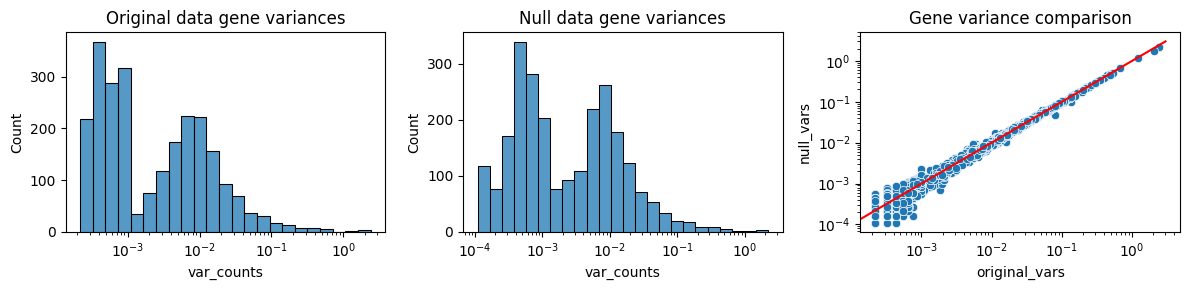

SignificanceResult(statistic=0.9777841512920025, pvalue=0.0)
[[1.         0.99907859]
 [0.99907859 1.        ]]


In [13]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))
sns.histplot(data_gene_nonzero.var, x="var_counts", ax=ax[0], log_scale=True)
ax[0].set_title("Original data gene variances")
sns.histplot(data_null_gen.var, x="var_counts", ax=ax[1], log_scale=True)
ax[1].set_title("Null data gene variances")

var_df_opt = pd.DataFrame({"original_vars": data_gene_nonzero.var["var_counts"], "null_vars": data_null_gen.var["var_counts"]})
var_df_opt["ratio"] = var_df_opt["null_vars"] / var_df_opt["original_vars"]
var_df_opt["diff"] = var_df_opt["null_vars"] - var_df_opt["original_vars"]

g = sns.scatterplot(var_df_opt, y="null_vars", x="original_vars", ax=ax[2])

g.set(xscale="log", yscale="log")
ax[2].plot([0, np.ceil(np.max(data_gene_nonzero.var["var_counts"]))], [0, np.ceil(np.max(data_gene_nonzero.var["var_counts"]))], color="red")
ax[2].set_title("Gene variance comparison")
plt.tight_layout()
plt.show()

print(spearmanr(var_df_opt["original_vars"], var_df_opt["null_vars"]))
print(np.corrcoef(var_df_opt["original_vars"], var_df_opt["null_vars"]))

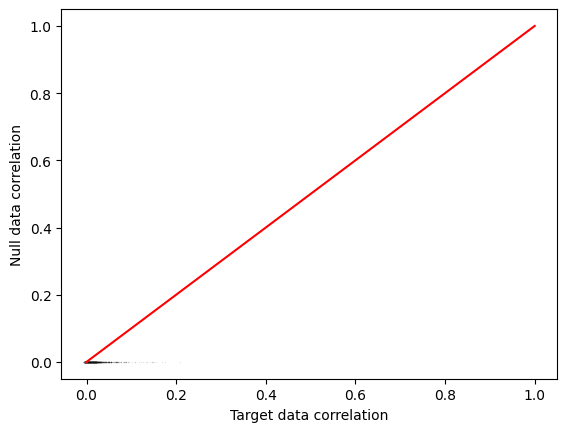

In [14]:
cor_shrink = cd.schaefer_strimmer(data_gene_nonzero.layers["counts"].toarray(), use_corr=True)
cor_shrink = pd.DataFrame(cor_shrink, index=data_gene_nonzero.var_names, columns=data_gene_nonzero.var_names)

cor_gen_shrink = cd.schaefer_strimmer(data_null_gen.X, use_corr=True)
cor_gen_shrink = pd.DataFrame(cor_gen_shrink, index=data_gene_nonzero.var_names, columns=data_gene_nonzero.var_names)

# Plot only 100.000 randomly sampled correlations instaed of ~30M
rng = np.random.default_rng(1234)
all_cors = pd.DataFrame({"cor_shrink": cor_shrink.values.flatten(), "cor_gen_shrink": cor_gen_shrink.values.flatten()})

ids = rng.choice(len(all_cors), 100000, replace=False)
all_cors_subset = all_cors.loc[ids]

sns.scatterplot(all_cors_subset[all_cors_subset['cor_shrink'] < 0.99], x="cor_shrink", y="cor_gen_shrink", s=1,
                color="black", alpha=0.1)
plt.plot([0, np.ceil(np.max(all_cors_subset['cor_shrink']))], [0, np.ceil(np.max(all_cors_subset['cor_shrink']))],
         color="red")
plt.xlabel("Target data correlation")
plt.ylabel("Null data correlation")

plt.show()

### Process null data

In [15]:
sc.pp.calculate_qc_metrics(data_null_gen)
data_null_gen.var["var_counts"] = np.asarray(np.var(data_null_gen.X, axis=0)).squeeze()
data_null_gen.var["mean_counts"] = np.asarray(np.mean(data_null_gen.X, axis=0)).squeeze()

In [16]:
importlib.reload(nb)
nb.estimate_overdisp_nb(data_null_gen, flavor="sctransform", seed=1234)
data_null_gen.layers["counts"] = data_null_gen.X.copy()

k_opt = data_gene.uns["BacSC_params"]["k_opt"]
n_neighbors_opt = data_gene.uns["BacSC_params"]["n_neighbors_opt"]
min_dist_opt = data_gene.uns["BacSC_params"]["min_dist_opt"]
res_opt = data_gene.uns["BacSC_params"]["res_opt"]
print(n_neighbors_opt)

sc.pp.calculate_qc_metrics(data_null_gen, var_type="genes", percent_top=None, log1p=True, inplace=True)
sc.pp.normalize_total(data_null_gen, target_sum=None, layer=None)
data_null_gen.X = sps.csr_matrix(np.log(data_null_gen.X + np.array(data_null_gen.var["nb_overdisp"] / 4)))
data_null_gen.layers["vst_counts"] = data_null_gen.X.copy()
sc.pp.scale(data_null_gen, max_value=10, zero_center=True)
data_null_gen.X[np.isnan(data_null_gen.X)] = 0
sc.tl.pca(data_null_gen, svd_solver='arpack')
sc.pp.neighbors(data_null_gen, n_neighbors=n_neighbors_opt, n_pcs=k_opt)
sc.tl.umap(data_null_gen, neighbors_key="neighbors", min_dist=min_dist_opt, spread=1)


15


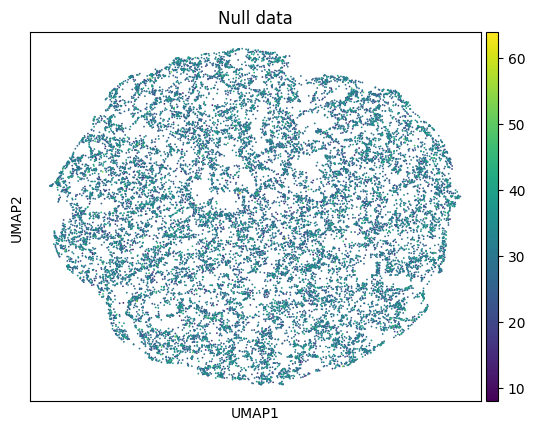

In [17]:
sc.pl.umap(data_null_gen, color="total_counts", alpha=1, cmap="viridis", title="Null data")
plt.show()


In [18]:
data_null_gen.write(data_path + "/null_data_BIDMC35.h5ad")

In [19]:
data_null_gen = sc.read_h5ad(data_path + "/null_data_BIDMC35.h5ad")
data_gene_nonzero = data_gene[:, data_null_gen.var_names].copy()

In [20]:
n_splits = 1
rng = np.random.default_rng(1234)
seeds = rng.choice(1000, n_splits)
null_pvals_dict = {}
min_pvals_null = []
c = 0
res_start = 0.01
res_step = 0.01

for s in seeds:
    res2 = res_start
    twoclust = False
    was_greater = False
    max_res_1_cluster = 0.01
    
    while twoclust is False:
        sc.tl.leiden(data_null_gen, resolution=res2, key_added=f"leiden_{c}", random_state=s)
        nclust = len(data_null_gen.obs[f"leiden_{c}"].unique())
        print(f"resolution: {res2}, clusters: {nclust}")

        if nclust == 2:
            twoclust = True
            break
        elif nclust < 2:
            if res2 > max_res_1_cluster:
                max_res_1_cluster = res2
            else: 
                res_step = res_step/2
            if was_greater:
                res2 += res_step
            else:
                res2 += 5*res_step
        else:
            was_greater = True
            min_res_2plus_clusters = res2
            res2 -= res_step
        res2 = np.round(res2, 15)

            
    X_null_gen_0 = data_null_gen.X[data_null_gen.obs[f"leiden_{c}"] == "0"]
    X_null_gen_1 = data_null_gen.X[data_null_gen.obs[f"leiden_{c}"] != "0"]
    null_pvals = ranksums(X_null_gen_0, X_null_gen_1, alternative="two-sided").pvalue
    null_pvals_dict[c] = null_pvals

    clusters = data_gene.obs["leiden_opt"].unique()
            
    min_pvals_null.append(np.min(null_pvals))
            
    print(f"split {c+1}/{n_splits} - Resolution {res2}")

    res_start = res2 - 5*res_step
    c += 1
    
best_split = np.where(min_pvals_null == np.max(min_pvals_null))[0][0]
print(f"Best split: No. {best_split} - seed: {seeds[best_split]} - minimal p-value: {min_pvals_null[best_split]}")

resolution: 0.01, clusters: 1
resolution: 0.035, clusters: 1
resolution: 0.06, clusters: 3
resolution: 0.055, clusters: 2
split 1/1 - Resolution 0.055
Best split: No. 0 - seed: 979 - minimal p-value: 1.5890907943713095e-14


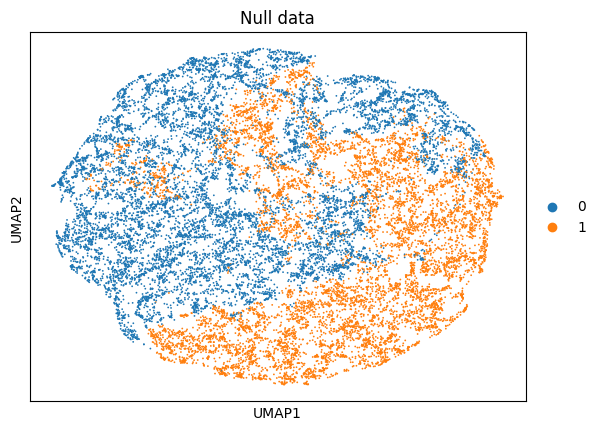

In [21]:
sc.pl.umap(data_null_gen, color=f"leiden_{best_split}", alpha=1, cmap="viridis", title="Null data")
plt.show()

In [22]:
data_null_gen.obs["leiden_best"] = data_null_gen.obs[f"leiden_{best_split}"]

data_null_gen.write(data_path + "/null_data_BIDMC35.h5ad")

In [23]:
importlib.reload(cd)
clusters = data_gene.obs["leiden_opt"].unique()
DEs_log_gen = {}
pvals_log_gen = {}
fdr = 0.05
rng = np.random.default_rng(1234)

for c in clusters:
    
    X_data_0 = data_gene_nonzero.X[data_gene_nonzero.obs["leiden_opt"] == c].copy()
    X_data_1 = data_gene_nonzero.X[data_gene_nonzero.obs["leiden_opt"] != c].copy()
    
    n_cells_0 = X_data_0.shape[0]
    n_cells_1 = X_data_1.shape[0]
    
    X_null_gen_0 = data_null_gen.X[data_null_gen.obs[f"leiden_best"] != "0"]
    X_null_gen_0 = X_null_gen_0[rng.integers(X_null_gen_0.shape[0], size=n_cells_0),:]
    X_null_gen_1 = data_null_gen.X[data_null_gen.obs[f"leiden_best"] == "0"]
    X_null_gen_1 = X_null_gen_1[rng.integers(X_null_gen_1.shape[0], size=n_cells_1),:]
    null_pvals = ranksums(X_null_gen_0, X_null_gen_1, alternative="two-sided").pvalue
    
    pvals_data = ranksums(X_data_0, X_data_1, alternative="two-sided").pvalue
    p_data = pd.DataFrame({"pval_data": pvals_data}, index=data_gene_nonzero.var.index)
    pval_null_gen = pd.DataFrame({"pval_null": null_pvals}, index=data_null_gen.var.index)
    
    DE_TU, pval_TU = cd.call_de(p_data, pval_null_gen, FDR=fdr, correct=False, nlog=True)
    data_gene_nonzero.var[f"pval_cluster_{c}_gen"] = pval_TU["pval_data"]
    data_gene_nonzero.var[f"q_cluster_{c}_gen"] = pval_TU["q"]
    data_gene_nonzero.var[f"DE_cluster_{c}_gen"] = (data_gene_nonzero.var[f"q_cluster_{c}_gen"] < fdr)
    
    DEs_log_gen[c] = DE_TU
    pvals_log_gen[c] = pval_TU
    print(f"Cluster {c} - DE genes: {len(DEs_log_gen[c])}; Minimum q value: {np.min(pvals_log_gen[c]['q'])}")

Cluster 1 - DE genes: 0; Minimum q value: 1.0
Cluster 0 - DE genes: 0; Minimum q value: 0.05
Cluster 2 - DE genes: 0; Minimum q value: 0.125
Cluster 5 - DE genes: 0; Minimum q value: 0.14285714285714285
Cluster 4 - DE genes: 1047; Minimum q value: 0.008695652173913044
Cluster 3 - DE genes: 0; Minimum q value: 0.06666666666666667
Cluster 6 - DE genes: 0; Minimum q value: 0.14285714285714285


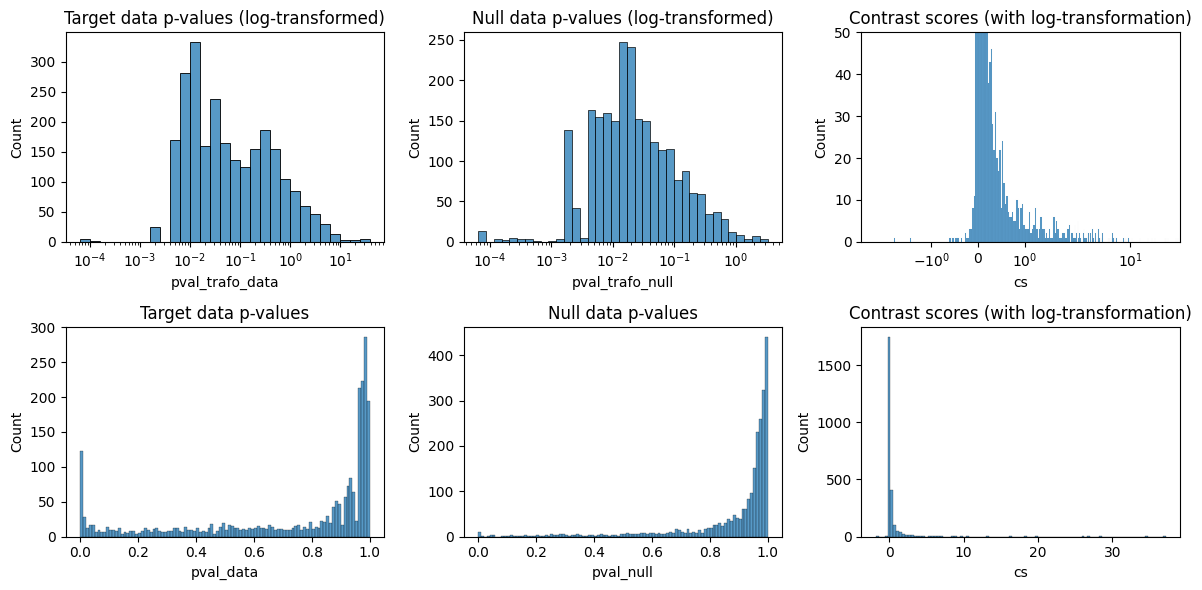

In [24]:
c = "4"

fig, ax = plt.subplots(2, 3, figsize=(12,6))
sns.histplot(pvals_log_gen[c], x="pval_trafo_data", ax=ax[0,0], log_scale=True)
ax[0,0].set_title("Target data p-values (log-transformed)")
sns.histplot(pvals_log_gen[c], x="pval_trafo_null", ax=ax[0,1], log_scale=True)
ax[0,1].set_title("Null data p-values (log-transformed)")

sns.histplot(pvals_log_gen[c], x="cs", ax=ax[0,2])
ax[0,2].set_title("Contrast scores (with log-transformation)")
ax[0,2].set(xscale="symlog", ylim=(0, 50))

sns.histplot(pvals_log_gen[c], x="pval_data", ax=ax[1,0], bins=100)
ax[1,0].set_title("Target data p-values")
sns.histplot(pvals_log_gen[c], x="pval_null", ax=ax[1,1], bins=100)
ax[1,1].set_title("Null data p-values")

sns.histplot(pvals_log_gen[c], x="cs", ax=ax[1,2], bins=100)
ax[1,2].set_title("Contrast scores (with log-transformation)")


plt.tight_layout()
plt.show()

In [25]:
for c in clusters:
    print(f"cluster {c}")
    print(pvals_log_gen[c]["q"].value_counts().sort_index())
    print("")

cluster 1
1.0    2477
Name: q, dtype: int64

cluster 0
0.050000      20
0.142857       1
0.160000       4
0.192308       1
0.205882       8
            ... 
0.729361      19
0.729749       2
0.731375       1
0.732999       1
1.000000    1080
Name: q, Length: 201, dtype: int64

cluster 2
0.125000       8
0.333333       7
0.444444       3
0.525000      22
0.596491      17
            ... 
0.794521       2
0.795437       1
0.797112       1
0.797327      31
1.000000    1130
Name: q, Length: 101, dtype: int64

cluster 5
0.142857       7
0.166667      23
0.195122      11
0.227273       3
0.260870       2
0.291667       2
0.591837       1
0.614035       8
0.775862       1
0.779661       1
0.786885       2
0.806452       1
0.823529       6
0.842857       2
0.880875    1164
0.880972       1
0.881068       1
0.883065       4
1.000000    1237
Name: q, dtype: int64

cluster 4
0.008696    115
0.010274    177
0.012422     30
0.014706     18
0.016393     26
           ... 
0.276387      1
0.278412   

In [26]:
pvals_log_gen["3"]

,pval_data,pval_null,pval_trafo_data,pval_trafo_null,cs,q
cds-OWG20444.1,7.761045e-87,0.577738,86.110080,0.238269,85.871811,0.066667
cds-OWG21689.1,7.667092e-87,0.166464,86.115369,0.778679,85.336691,0.066667
cds-OWG23123.1,6.031451e-54,0.002203,53.219578,2.656989,50.562589,0.066667
cds-OWG21702.1,8.060210e-35,0.746808,34.093654,0.126791,33.966862,0.066667
cds-OWG20000.1,1.611749e-30,0.589692,29.792703,0.229375,29.563327,0.066667
...,...,...,...,...,...,...
cds-OWG23140.1,6.758004e-01,0.000862,0.170182,3.064641,-2.894460,1.000000
cds-OWG23122.1,8.077197e-01,0.000604,0.092739,3.218853,-3.126114,1.000000
cds-OWG23125.1,6.643155e-01,0.000190,0.177626,3.720383,-3.542757,1.000000
cds-OWG23131.1,7.850248e-01,0.000144,0.105117,3.843081,-3.737964,1.000000


In [34]:
data_gene_nonzero.uns["ClusterDE_results"]

{'1':                 pval_data  pval_null  pval_trafo_data  pval_trafo_null  \
 cds-OWG21689.1   0.000089   0.426285         4.051674         0.370300   
 cds-OWG20444.1   0.000271   0.166482         3.566358         0.778633   
 cds-OWG16451.1   0.190266   0.906126         0.720638         0.042811   
 cds-OWG23250.1   0.223394   0.875463         0.650929         0.057762   
 cds-OWG20292.1   0.190266   0.731514         0.720638         0.135777   
 ...                   ...        ...              ...              ...   
 cds-OWG23540.1   0.579530   0.000099         0.236924         4.003039   
 cds-OWG23125.1   0.777535   0.000080         0.109280         4.098518   
 cds-OWG22215.1   0.906779   0.000063         0.042499         4.200778   
 cds-OWG23120.1   0.110152   0.000006         0.958009         5.232596   
 cds-OWG19889.1   0.783402   0.000002         0.106015         5.617316   
 
                       cs    q  
 cds-OWG21689.1  3.681374  1.0  
 cds-OWG20444.1  2.787725  

In [27]:
data_gene_nonzero.uns["ClusterDE_results"] = pvals_log_gen

data_gene_nonzero.uns["ClusterDE_results"]['params'] = {'groupby': 'leiden_opt',
  'reference': 'rest',
  'use_raw': False,
  'layer': None,
}

In [35]:
data_gene_nonzero.write(data_path + "/klebsiella_BIDMC35_data_processed_cluster.h5ad")

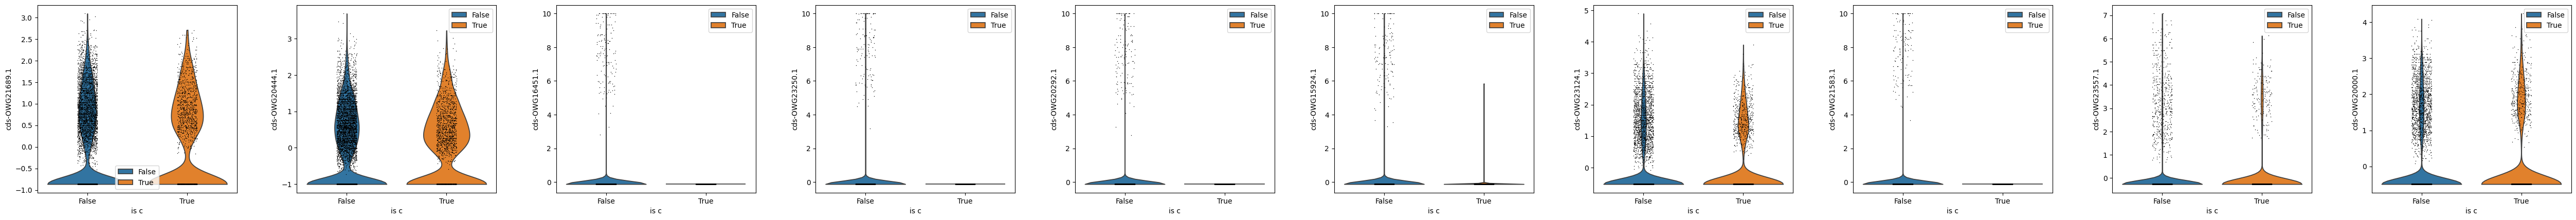

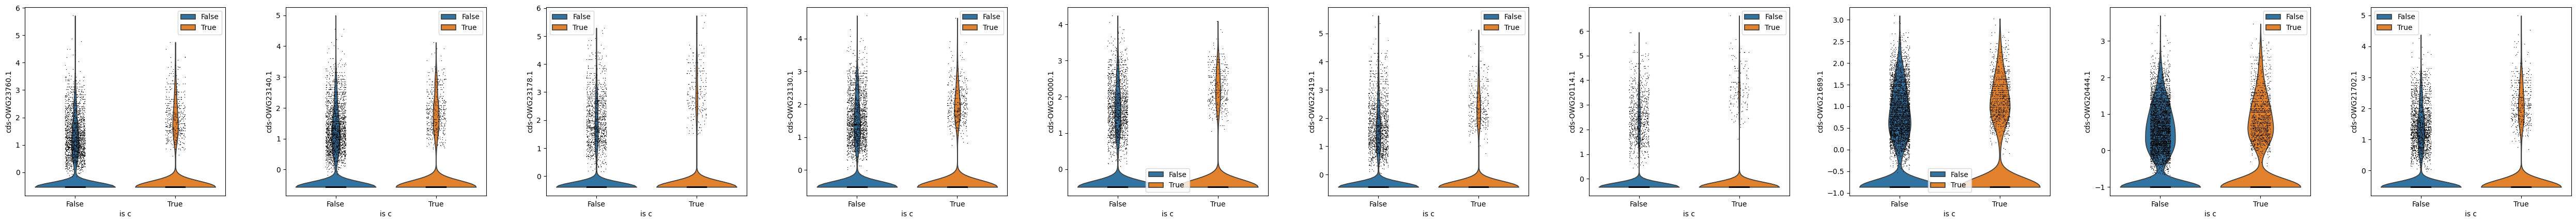

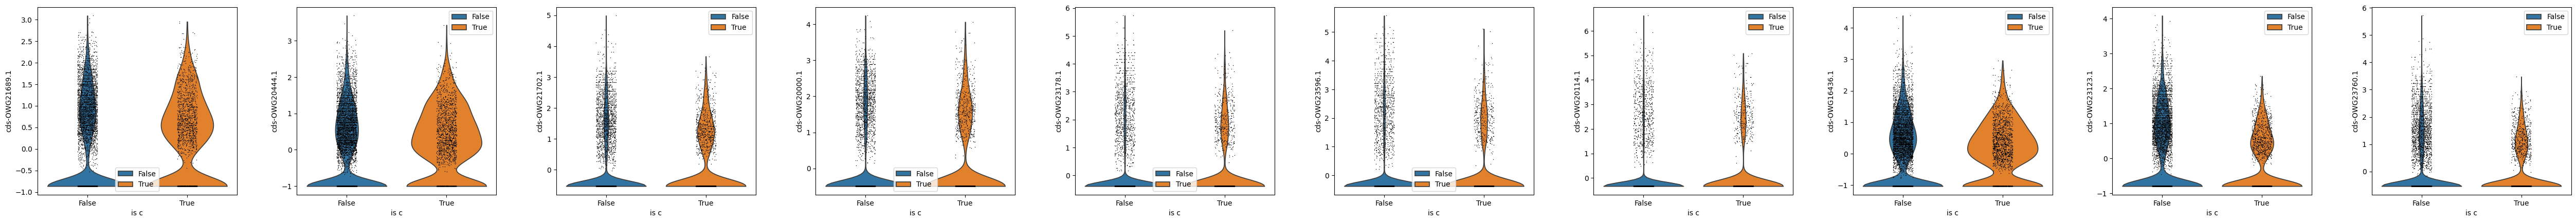

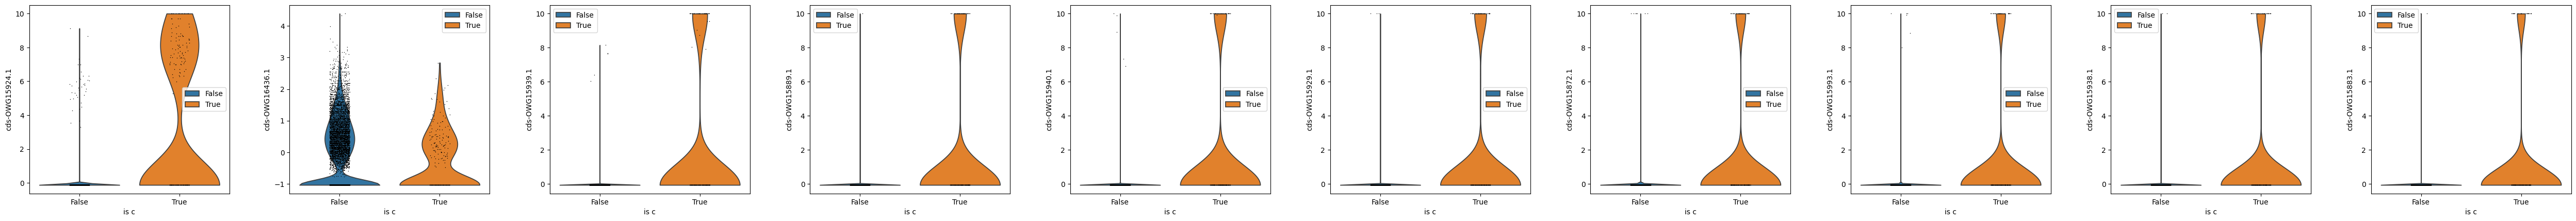

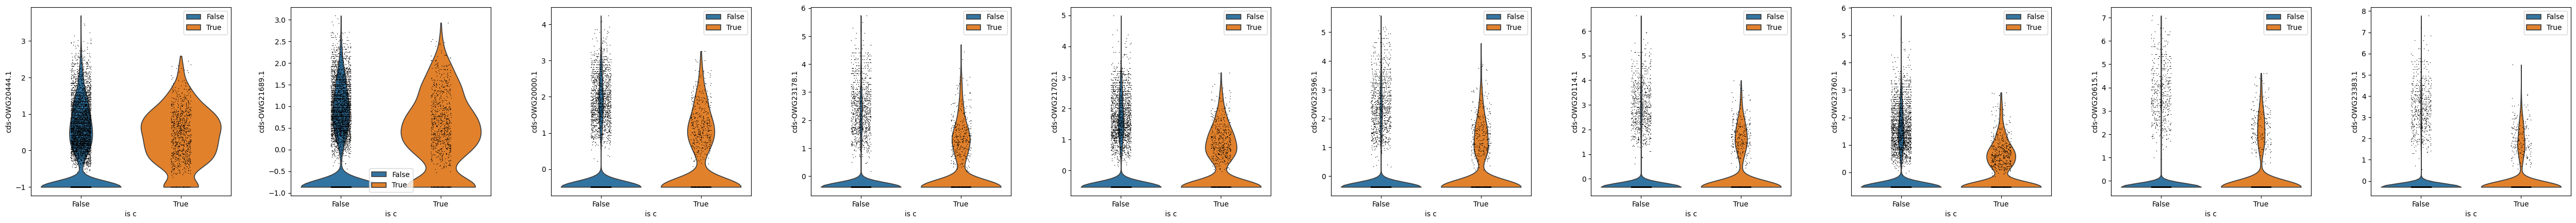

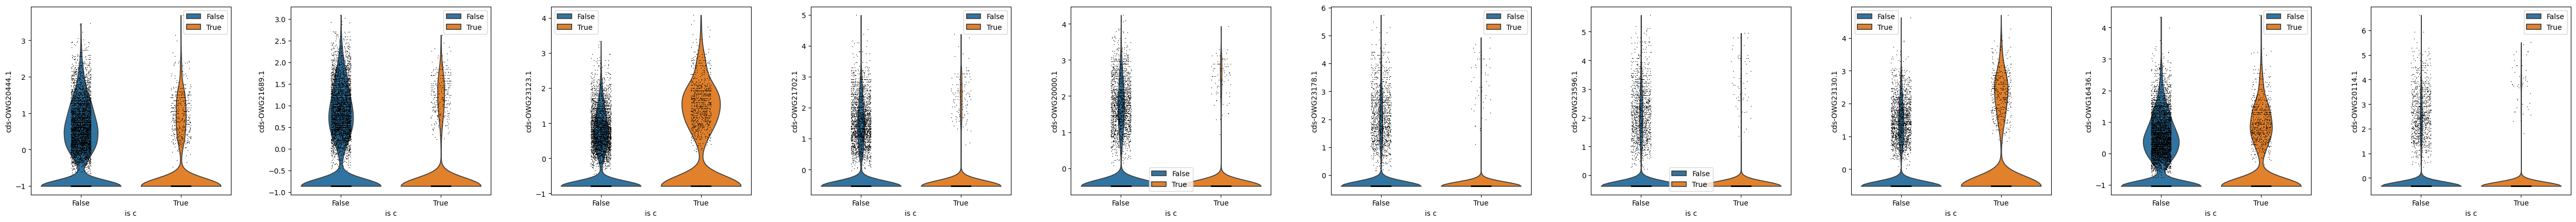

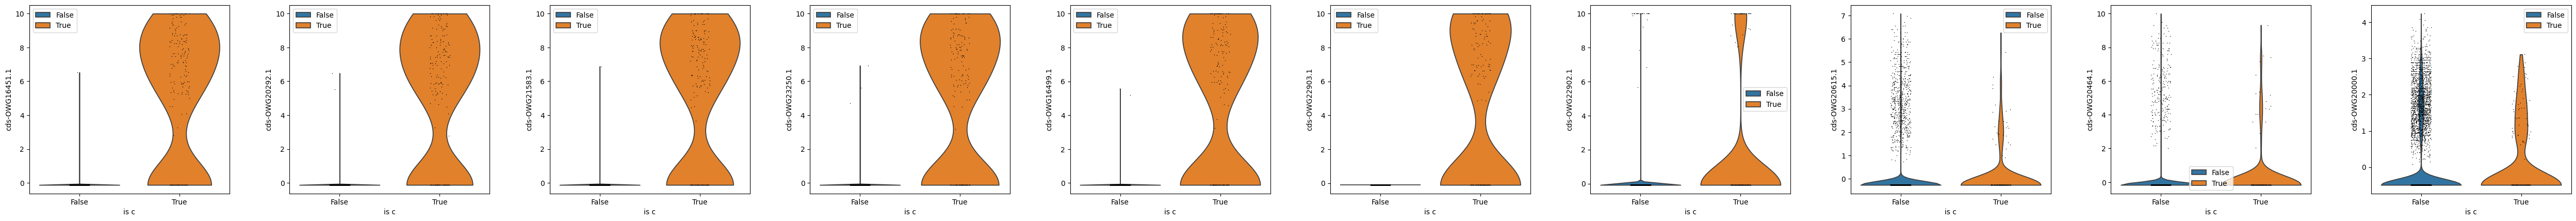

In [29]:
for c in clusters:
    plot_genes = data_gene_nonzero.uns["ClusterDE_results"][c].iloc[:10,:].index.tolist()
    data_gene_nonzero.obs["is_c"] = pd.Categorical([x==c for x in data_gene_nonzero.obs["leiden_opt"]])
    with plt.rc_context({"figure.figsize": (5, 5)}):
        sc.pl.violin(data_gene_nonzero, keys=plot_genes, groupby="is_c", multi_panel=True)

In [30]:
data_gene.var

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,var_counts,is_scd_outlier,nb_overdisp,...,means,variances,variances_norm,gene_mean,gene_var,mean_var_diff,gene_dist,est_mean,est_overdisp,est_zero_inflation
cds-OWG15609.1,9,0.000982,0.000981,99.901832,9.0,2.302585,9,0.000981,False,0.045494,...,0.000982,0.000981,0.983433,0.000982,0.000981,9.636866e-07,poi,0.005008,inf,0.803549
cds-OWG15869.1,15,0.001963,0.001961,99.836387,18.0,2.944439,15,0.002614,False,0.022197,...,0.001963,0.002614,1.290825,0.001963,0.002614,-6.505955e-04,nb,0.001968,0.014223,0.000000
cds-OWG15870.1,7,0.000873,0.000872,99.923647,8.0,2.197225,7,0.001090,False,0.004161,...,0.000873,0.001090,1.231782,0.000873,0.001090,-2.173887e-04,nb,0.000864,0.002902,0.000000
cds-OWG15871.1,14,0.001854,0.001853,99.847295,17.0,2.890372,14,0.002724,False,0.028152,...,0.001854,0.002724,1.425858,0.001854,0.002723,-8.691620e-04,nb,0.001857,0.028309,0.000000
cds-OWG15872.1,35,0.004145,0.004136,99.618237,38.0,3.663562,35,0.004783,False,0.134263,...,0.004145,0.004783,1.121176,0.004145,0.004782,-6.372705e-04,nb,0.004136,0.023771,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cds-OWG24206.1,45,0.005017,0.005005,99.509162,46.0,3.850148,45,0.005211,False,0.108141,...,0.005017,0.005211,1.012521,0.005017,0.005210,-1.929753e-04,nb,0.005021,0.022296,0.000000
cds-OWG24207.1,73,0.008181,0.008147,99.203752,75.0,4.330733,73,0.008551,False,0.252581,...,0.008181,0.008551,1.014898,0.008181,0.008550,-3.693775e-04,nb,0.008177,0.173607,0.000000
cds-OWG24208.1,264,0.029996,0.029555,97.120419,275.0,5.620401,264,0.032148,False,0.676339,...,0.029996,0.032154,1.012570,0.029996,0.032150,-2.154363e-03,nb,0.029999,0.523862,0.000000
cds-OWG24214.1,39,0.004472,0.004462,99.574607,41.0,3.737670,39,0.004888,False,0.123162,...,0.004472,0.004889,1.064154,0.004472,0.004888,-4.163007e-04,nb,0.004471,0.049165,0.000000


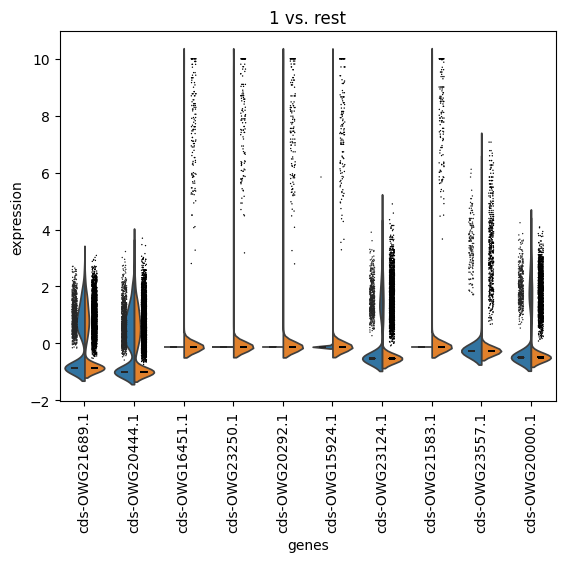

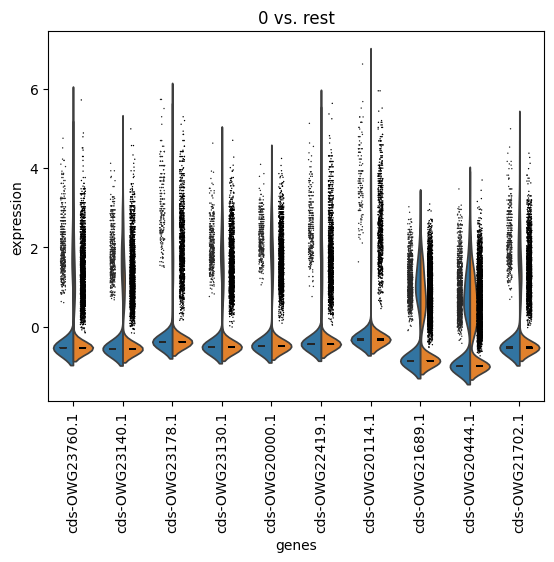

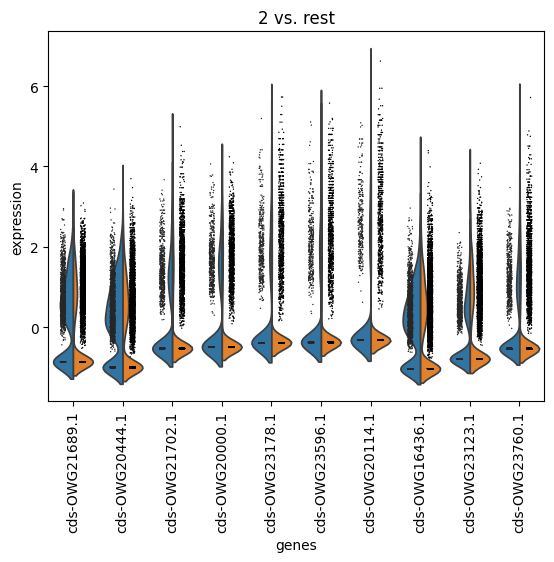

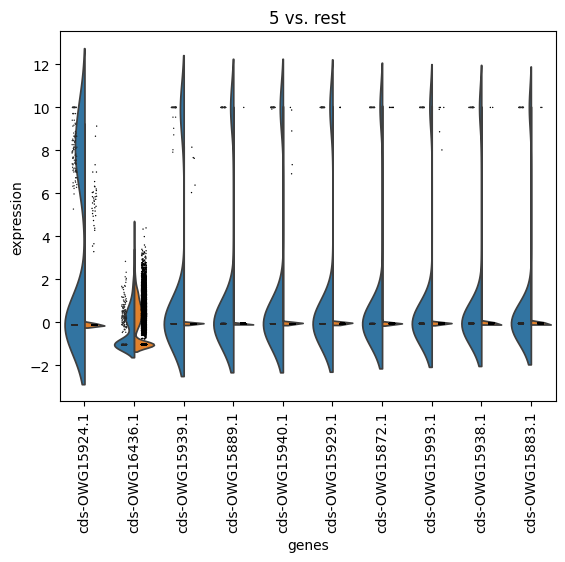

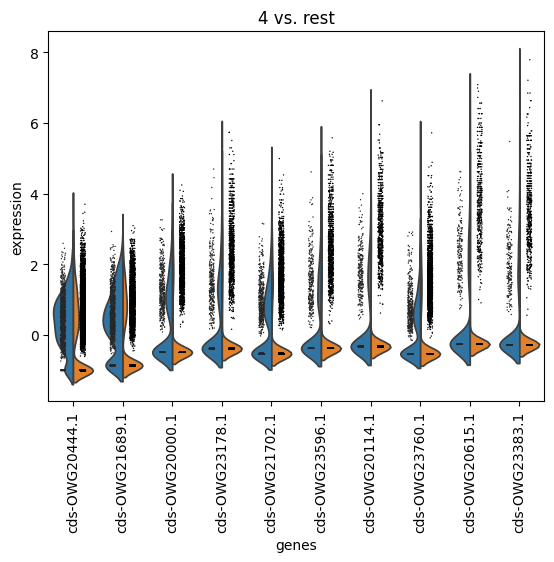

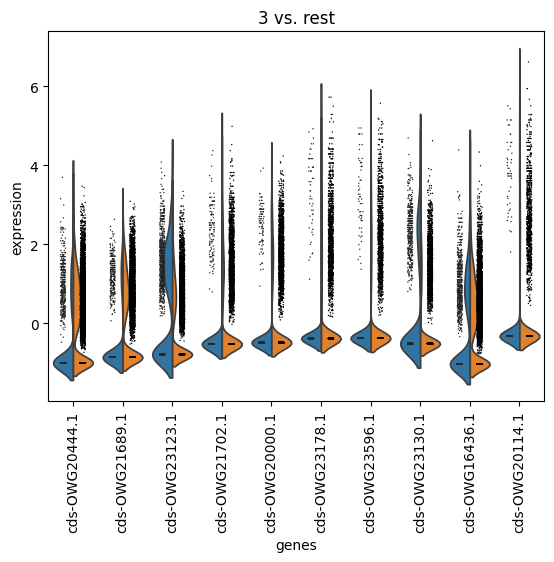

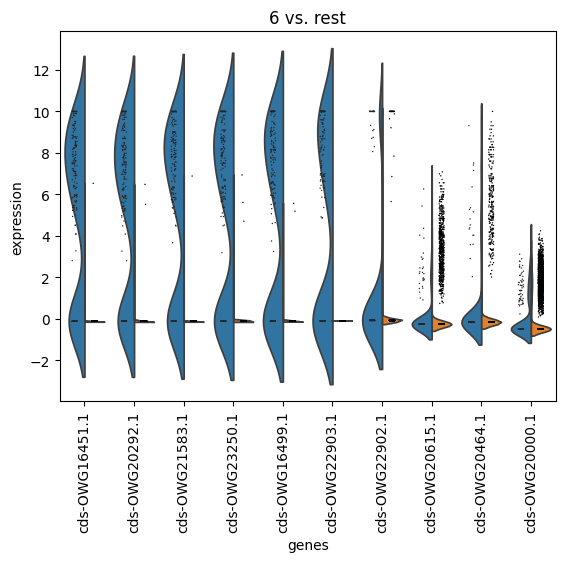

In [31]:
n_genes = 10
for c in clusters:
    plot_genes = data_gene_nonzero.uns["ClusterDE_results"][c].iloc[:n_genes,:].index.tolist()
    sc.pl.rank_genes_groups_violin(data_gene_nonzero, gene_names=plot_genes, key="ClusterDE_results", groups=c)

In [32]:
all_marker_genes = []
for c in clusters:
    plot_genes = data_gene_nonzero.uns["ClusterDE_results"][c].iloc[:n_genes,:].index.tolist()
    all_marker_genes += plot_genes
    print(f"Cluster {c}")
    print(data_gene.var.loc[plot_genes, ["locus_tag", "name", "symbol"]])

Cluster 1


KeyError: "None of [Index(['locus_tag', 'name', 'symbol'], dtype='object')] are in the [columns]"

In [ ]:
sc.pl.heatmap(data_gene_nonzero, all_marker_genes, groupby='leiden_opt', swap_axes=True, show_gene_labels=True)